In [1]:
import pymongo
from pandas.io.json import json_normalize
import pandas as pd
import datetime
import io

In [ ]:
#from sklearn.preprocessing import RobustScaler
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='ecorreig', api_key='lr8juh00af')
import cufflinks as cf
import pandas as pd
import numpy as np

In [21]:
def data_loop():
    first_date = pd.to_datetime("2018-03-20 12:36:00", infer_datetime_format=True)
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client.aggregated
    collection = db.binance_aggregation
    
    more = True
    date = first_date
    i = 1
    while more:
        end_date = date + datetime.timedelta(days = 30)
        data = list(collection.find({"date" : { '$gte': date, '$lt': end_date}}))
        df = json_normalize(data).transpose()
        df.index = df["date"]
        df = df.drop(["_id", "date"], axis = 1).transpose()
        df.to_csv("new_data_" + str(i) + ".csv")
        
        if df.shape[1]<40000:
            more = False
        
        date = end_date
        i += 1

In [22]:
data_loop()

KeyError: 'date'

In [31]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client.aggregated
collection = db.binance_aggregation

In [80]:
now = datetime.datetime(2019, 2, 27, 0, 0, 0)

findDate = now 
untilBackup = now + datetime.timedelta(minutes=- int(180))
data = list(collection.find())

In [85]:
df = json_normalize(data)

In [86]:
df.index = df["date"]

In [87]:
df = df.drop(["_id", "date"], axis = 1).transpose()

In [88]:
df.head()

date,2019-02-27 00:01:00,2019-02-27 00:03:00,2019-02-27 00:04:00,2019-02-27 00:06:00,2019-02-27 00:08:00,2019-02-27 00:10:00,2019-02-27 00:12:00,2019-02-27 00:14:00,2019-02-27 00:16:00,2019-02-27 00:18:00,...,2018-11-20 23:50:00,2018-11-20 23:51:00,2018-11-20 23:52:00,2018-11-20 23:53:00,2018-11-20 23:54:00,2018-11-20 23:55:00,2018-11-20 23:56:00,2018-11-20 23:57:00,2018-11-20 23:58:00,2018-11-20 23:59:00
ADA.p,0.00001127,0.00001125,0.00001126,0.00001126,0.00001127,0.00001125,0.00001125,0.00001125,0.00001124,0.00001124,...,0.00001006,0.00001004,0.00001006,0.00001006,0.00001001,0.00001003,0.00001004,0.00001003,0.00001003,0.00001005
ADX.p,0.00003200,0.00003200,0.00003221,0.00003200,0.00003200,0.00003200,0.00003210,0.00003210,0.00003187,0.00003187,...,0.00002235,0.00002235,0.00002235,0.00002235,0.00002235,0.00002235,0.00002224,0.00002234,0.00002234,0.00002234
AE.p,0.00011340,0.00011340,0.00011320,0.00011320,0.00011340,0.00011290,0.00011300,0.00011340,0.00011330,0.00011330,...,0.00013640,0.00013700,0.00013700,0.00013700,0.00013700,0.00013700,0.00013700,0.00013600,0.00013620,0.00013650
AGI.p,0.00001219,0.00001215,0.00001206,0.00001206,0.00001206,0.00001206,0.00001214,0.00001214,0.00001214,0.00001214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AION.p,0.00003040,0.00003040,0.00003040,0.00003020,0.00003020,0.00003000,0.00003000,0.00003000,0.00003000,0.00002990,...,0.00003830,0.00003850,0.00003850,0.00003840,0.00003840,0.00003840,0.00003840,0.00003860,0.00003850,0.00003830


In [78]:
(df.columns[1]- df.columns[0]).total_seconds()

120.00000000000001

In [48]:
142000/60/24

98.6111111111111

In [79]:
df_tot = df

In [89]:
df_tot.shape

(144, 142949)

In [90]:
fd = df_tot.transpose()

In [91]:
fd['date'] = fd.index

In [95]:
fd = fd.sort_values(by='date')

In [94]:
fd['date'] =pd.to_datetime(fd.date)

In [98]:
fd = fd.drop(['date'], axis = 1)

In [99]:
df_tot = fd.transpose()

In [100]:
df_tot.head()

date,2018-11-20 00:00:00,2018-11-20 00:01:00,2018-11-20 00:02:00,2018-11-20 00:03:00,2018-11-20 00:04:00,2018-11-20 00:05:00,2018-11-20 00:06:00,2018-11-20 00:07:00,2018-11-20 00:08:00,2018-11-20 00:09:00,...,2019-02-27 06:19:00,2019-02-27 06:20:00,2019-02-27 06:21:00,2019-02-27 06:22:00,2019-02-27 06:23:00,2019-02-27 06:24:00,2019-02-27 06:25:00,2019-02-27 06:26:00,2019-02-27 06:27:00,2019-02-27 06:28:00
ADA.p,0.00001074,0.00001074,0.00001072,0.00001070,0.00001075,0.00001070,0.00001070,0.00001071,0.00001070,0.00001066,...,0.00001117,0.00001116,0.00001116,0.00001117,0.00001117,0.00001117,NaN,NaN,NaN,NaN
ADX.p,0.00002325,0.00002325,0.00002320,0.00002303,0.00002297,0.00002297,0.00002297,0.00002297,0.00002297,0.00002297,...,0.00003200,0.00003200,0.00003200,0.00003200,0.00003196,0.00003193,0.00003202,NaN,NaN,NaN
AE.p,0.00015220,0.00015220,0.00015170,0.00015120,0.00015150,0.00015160,0.00015160,0.00015040,0.00014990,0.00014990,...,0.00011300,0.00011290,0.00011290,0.00011310,0.00011310,0.00011310,0.00011300,NaN,NaN,NaN
AGI.p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00001208,0.00001208,0.00001208,0.00001206,0.00001206,0.00001210,0.00001210,0.00001210,0.00001210,NaN
AION.p,0.00004170,0.00004180,0.00004180,0.00004180,0.00004180,0.00004130,0.00004140,0.00004160,0.00004150,0.00004150,...,0.00003140,0.00003150,0.00003130,0.00003140,0.00003140,0.00003140,0.00003120,NaN,NaN,NaN


In [114]:
import matplotlib.pyplot as plt

In [134]:
df_filtered.isnull().sum().sum()

0

In [132]:
df_filtered = df_filtered[df_filtered.isnull().sum(axis=1) < 30]

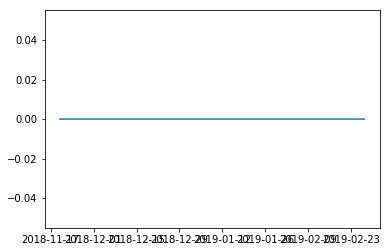

In [133]:
plt.plot(df_filtered.isnull().sum())

In [122]:
fora= list(df_tot.index[df_tot.iloc[:,0].isnull()])

In [124]:
df_filtered = df_tot[~df_tot.index.isin(fora)]

In [129]:
df_filtered = df_filtered.iloc[:, :-5]

In [137]:
df_filtered.iloc[:, :47648].to_csv('new_data_01.csv')

In [138]:
df_filtered.iloc[:, 47648:int(2*47648)].to_csv('new_data_02.csv')
df_filtered.iloc[:, int(2*47648):].to_csv('new_data_03.csv')